In [1]:
from keras.models import Sequential, Model, load_model
from keras.layers import Lambda, LeakyReLU, Reshape, Add, Cropping2D, Conv2DTranspose, Permute, Conv2D, MaxPooling2D, Flatten, Activation
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import tables

C:\Users\aaron\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
f = tables.open_file('data.h5', mode='r')

x_train = f.root.train_i[()]
y_train = f.root.train_t[()]

f.close()

In [3]:
model = load_model('face_model.h5')

C:\Users\aaron\Anaconda3\lib\site-packages\keras\models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
permute_1_input (InputLayer)    (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 224, 224, 3)  0           permute_1_input[0][0]            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 224, 224, 64) 1792        permute_1[0][0]                  
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 224, 224, 64) 36928       conv1_1[0][0]                    
__________________________________________________________________________________________________
max_poolin

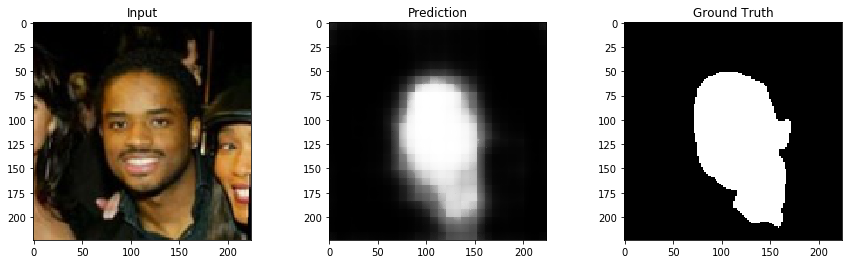

In [39]:
pred1 = model.predict(np.expand_dims(x_train[19], axis=0))
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
plt.imshow(x_train[19].astype('uint8'))
plt.title("Input")
plt.subplot(1,3,2)
plt.imshow(pred1.reshape(224,224), cmap='gray')
plt.title("Prediction")
plt.subplot(1,3,3)
plt.imshow(y_train[19], cmap='gray')
plt.title("Ground Truth")
plt.show()

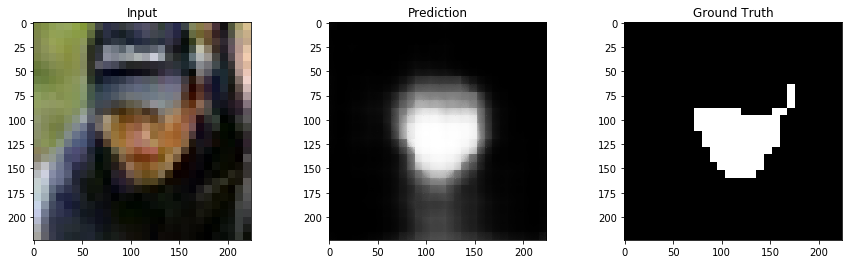

In [28]:
pred2 = model.predict(np.expand_dims(x_train[1001], axis=0))
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
plt.imshow(x_train[1001].astype('uint8'))
plt.title("Input")
plt.subplot(1,3,2)
plt.imshow(pred2.reshape(224,224), cmap='gray')
plt.title("Prediction")
plt.subplot(1,3,3)
plt.imshow(y_train[1001], cmap='gray')
plt.title("Ground Truth")
plt.show()

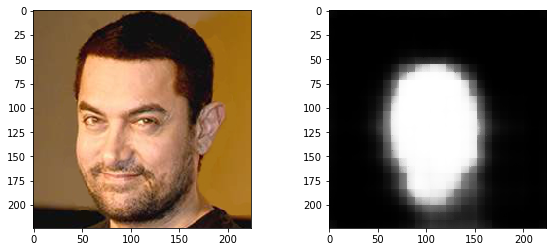

In [47]:
from PIL import Image

img = Image.open('ak.png').convert('RGB')
img = img.resize((224,224))
img = np.array(img).astype(np.float32)

out = model.predict(np.expand_dims(img, axis=0))
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
plt.imshow(img.astype('uint8'))
plt.subplot(1,3,2)
plt.imshow(out.reshape(224,224), cmap='gray')
plt.show()